### Group B: Machine Learning

#### Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks: 
1. Pre-process the dataset. 
2. Identify outliers. 
3. Check the correlation. 
4. Implement linear regression and random forest regression models. 
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

## Data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df['key'].value_counts()

2015-05-07 19:52:06.0000003      1
2012-10-14 22:58:00.00000051     1
2013-09-06 10:59:00.00000086     1
2013-12-27 20:23:50.0000001      1
2010-07-22 18:55:00.000000151    1
                                ..
2010-06-28 11:17:41.0000005      1
2010-12-01 12:58:32.0000001      1
2013-05-12 21:10:21.0000003      1
2014-08-09 16:03:54.0000002      1
2010-05-15 04:08:00.00000076     1
Name: key, Length: 200000, dtype: int64

In [8]:
df['pickup_datetime'].value_counts()

2014-04-13 18:19:00 UTC    4
2010-03-14 12:00:00 UTC    4
2009-02-12 12:46:00 UTC    4
2011-02-18 18:55:00 UTC    3
2009-03-12 17:12:00 UTC    3
                          ..
2013-03-08 07:16:00 UTC    1
2013-05-17 21:33:31 UTC    1
2009-10-24 04:05:00 UTC    1
2013-05-16 16:12:00 UTC    1
2010-05-15 04:08:00 UTC    1
Name: pickup_datetime, Length: 196629, dtype: int64

In [9]:
df["Unnamed: 0"].value_counts()

24238194    1
23286231    1
45197665    1
30631497    1
7869264     1
           ..
53467014    1
15557161    1
11971041    1
6135974     1
11951496    1
Name: Unnamed: 0, Length: 200000, dtype: int64

In [10]:
# df1 = df.drop(["Unnamed: 0","key","pickup_datetime"],axis=1)
df1 = df.drop(["Unnamed: 0","key"],axis=1)
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [13]:
df1.fillna(df1.median(),inplace = True)

C:\Users\SIT\AppData\Local\Temp/ipykernel_6136/3299596212.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.fillna(df1.median(),inplace = True)


In [14]:
df1.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
df1.dtypes 

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [16]:
for i in df1.columns:
    print(df1.value_counts(i))
    

fare_amount
6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
26.94        1
56.90        1
56.83        1
27.25        1
499.00       1
Length: 1244, dtype: int64
pickup_datetime
2009-02-12 12:46:00 UTC    4
2014-04-13 18:19:00 UTC    4
2010-03-14 12:00:00 UTC    4
2013-11-23 19:51:00 UTC    3
2009-04-11 23:57:00 UTC    3
                          ..
2011-03-18 21:05:37 UTC    1
2011-03-18 21:16:04 UTC    1
2011-03-18 21:18:51 UTC    1
2011-03-18 21:26:34 UTC    1
2015-06-30 23:40:39 UTC    1
Length: 196629, dtype: int64
pickup_longitude
 0.000000     3786
-73.137393      72
-73.988275      20
-73.982210      20
-73.981397      20
              ... 
-73.973091       1
-73.973094       1
-73.973097       1
-73.973099       1
 57.418457       1
Length: 71066, dtype: int64
pickup_latitude
0.000000       3782
41.366138        72
40.774100        20
40.774000        20
40.755900        20
               ... 
40.738270         1
40.738271         1
40

In [17]:
df1.duplicated().count()

200000

In [18]:
df1.duplicated().sum()

0

In [19]:
df1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923895,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733824,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [60]:
import pandas as pd

data = [[10, 18, 11], 
        [13, 15, 8,4], 
        [9, 20, 3,5]]

df = pd.DataFrame(data)

print(df.describe()) 

               0          1          2         3
count   3.000000   3.000000   3.000000  2.000000
mean   10.666667  17.666667   7.333333  4.500000
std     2.081666   2.516611   4.041452  0.707107
min     9.000000  15.000000   3.000000  4.000000
25%     9.500000  16.500000   5.500000  4.250000
50%    10.000000  18.000000   8.000000  4.500000
75%    11.500000  19.000000   9.500000  4.750000
max    13.000000  20.000000  11.000000  5.000000


In [69]:
mn = 32/3
mn

10.666666666666666

In [71]:
df.std()

0    2.081666
1    2.516611
2    4.041452
3    0.707107
dtype: float64

In [70]:
np.sqrt(((10-mn)**2+(13-mn)**2+(9-mn)**2)/2)

2.081665999466133

In [73]:
32*0.25

8.0

In [20]:
df1.pickup_datetime

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: pickup_datetime, Length: 200000, dtype: object

In [21]:
df1.pickup_datetime.dtypes

dtype('O')

In [22]:
df1.pickup_datetime = pd.to_datetime(df1.pickup_datetime, errors='coerce') 

In [23]:
df1.pickup_datetime.dtypes

datetime64[ns, UTC]

In [24]:
# df1['pickup_datetime']=df1['pickup_datetime'].str.replace(' UTC','')

In [25]:
# df1['pickup_datetime']

In [26]:
# for i in df1['pickup_datetime']:
#     df1[i] = datetime.strptime(i,"%Y-%m-%d %H:%M:%S")

In [27]:
df1 = df1.assign(hour = df1.pickup_datetime.dt.hour,
             day= df1.pickup_datetime.dt.day,
             month = df1.pickup_datetime.dt.month,
             year = df1.pickup_datetime.dt.year,
             dayofweek = df1.pickup_datetime.dt.dayofweek)

In [28]:
df1.pickup_datetime.dt

In [29]:
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


### Heversine formula to calculate the distance between two points and journey, using the longitude and latitude values.

In [30]:
from math import *

In [31]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [32]:
df1['dist_travel_km'] = distance_transform(df1['pickup_longitude'],
                                                df1['pickup_latitude'],
                                                df1['dropoff_longitude'],
                                                df1['dropoff_latitude']
                                              )

In [33]:
df1['dist_travel_km'] = distance_transform(df1['pickup_longitude'].to_numpy(),
                                                df1['pickup_latitude'].to_numpy(),
                                                df1['dropoff_longitude'].to_numpy(),
                                                df1['dropoff_latitude'].to_numpy()
                                              )

In [34]:
df1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [35]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df1 = df1.drop('pickup_datetime',axis=1)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  200000 non-null  float64
 4   dropoff_latitude   200000 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   hour               200000 non-null  int64  
 7   day                200000 non-null  int64  
 8   month              200000 non-null  int64  
 9   year               200000 non-null  int64  
 10  dayofweek          200000 non-null  int64  
 11  dist_travel_km     200000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 18.3 MB


### Identify outliers

In [37]:
import seaborn as sns

<AxesSubplot:>

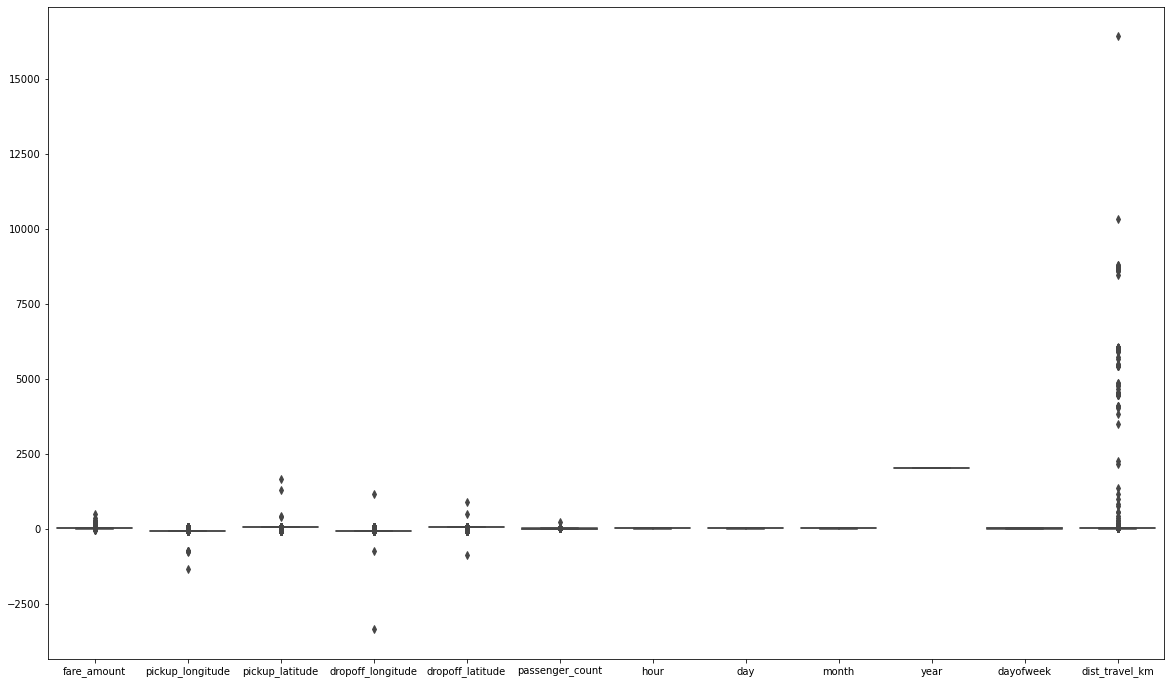

In [38]:
plt.figure(figsize=(20,12))
sns.boxplot(data= df1)

### Treat outliers

In [ ]:
err

In [39]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df1 , c)
    return df1

In [40]:
 df1 = treat_outliers_all(df1 , df1.columns)

<AxesSubplot:>

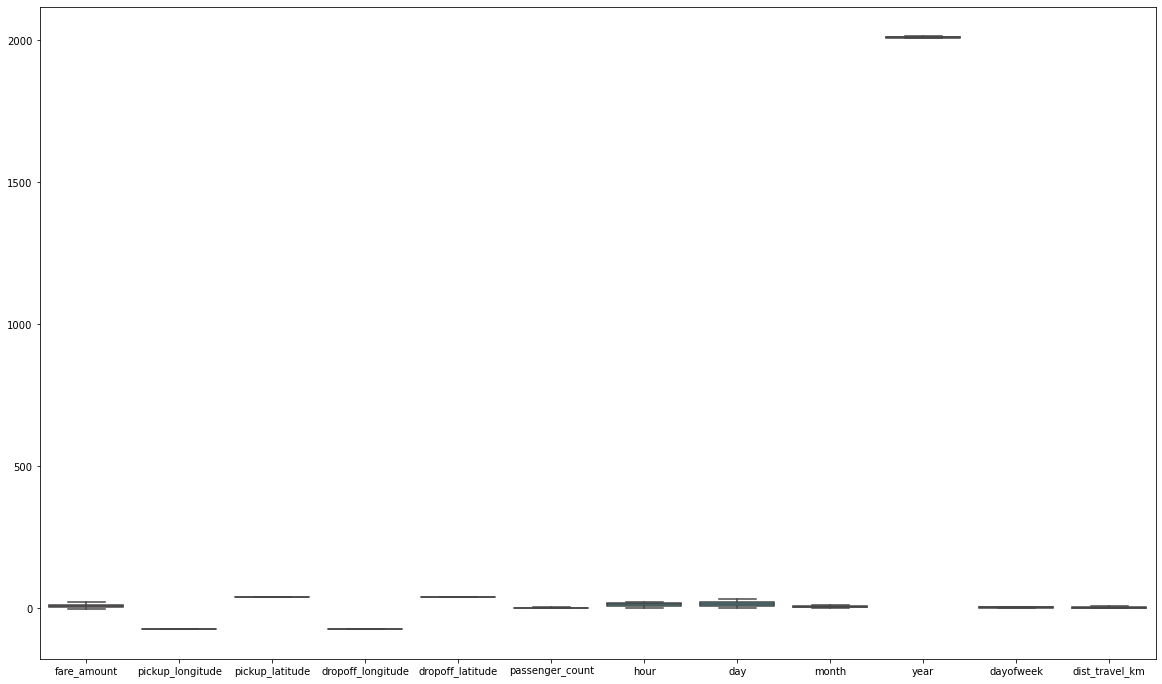

In [41]:
plt.figure(figsize=(20,12))
sns.boxplot(data= df1)

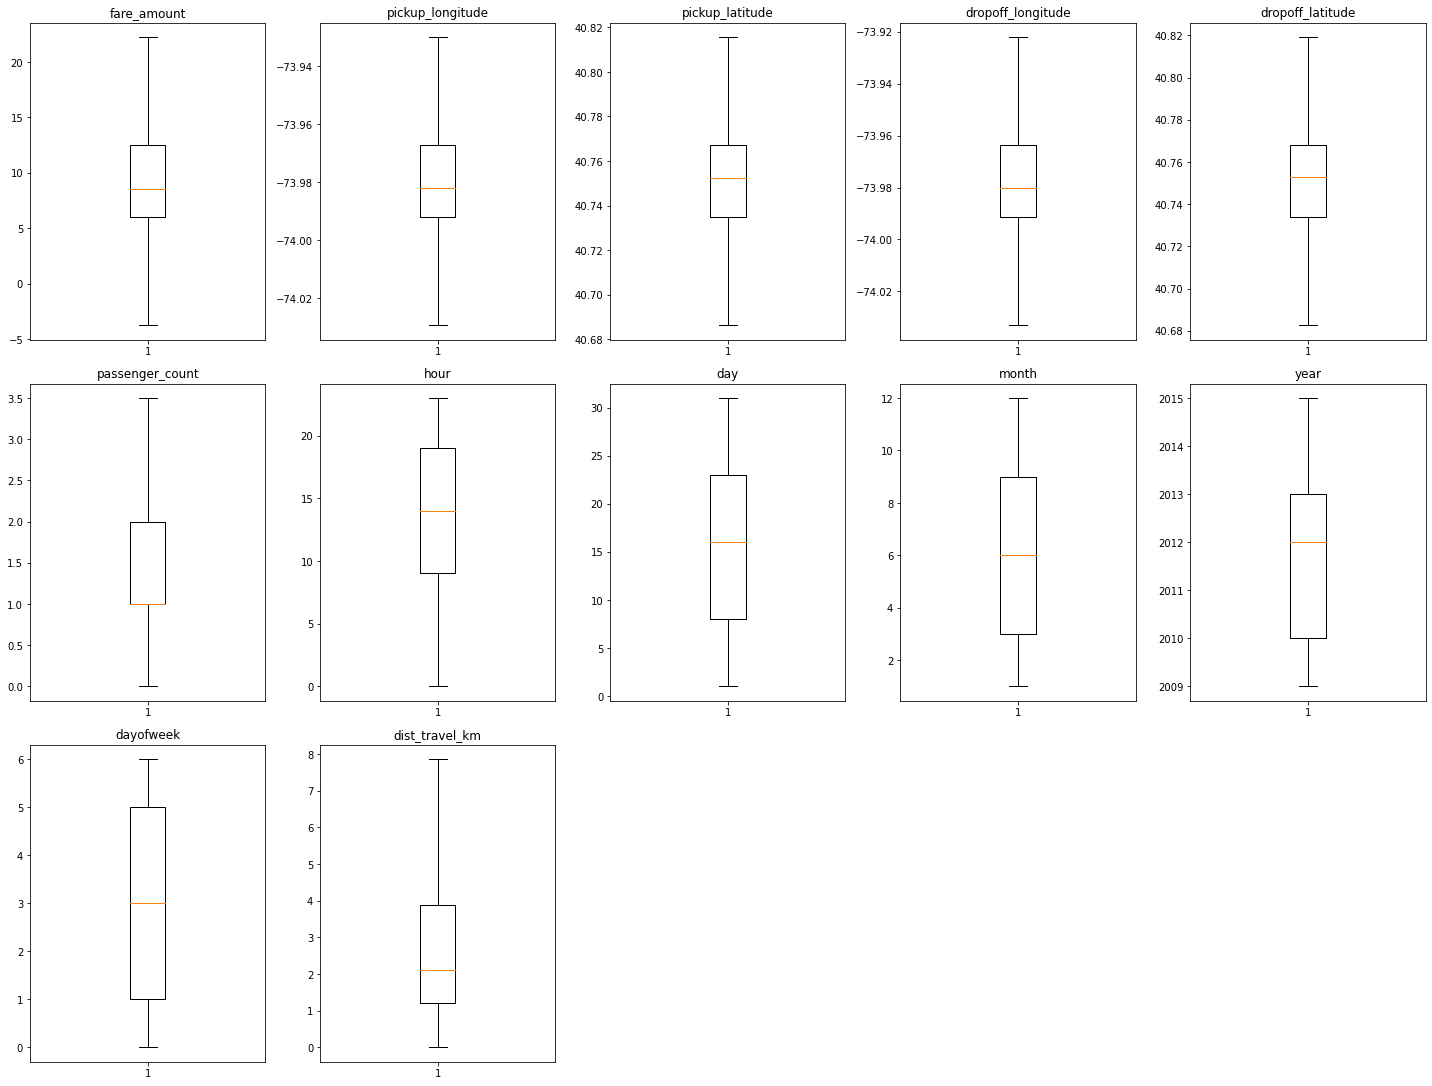

In [42]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df1.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df1[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [43]:
df1.shape

(200000, 12)

In [74]:
df1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.081121,-73.978310,40.750196,-73.976193,40.750151,1.514368,13.491335,15.704670,6.281795,2011.742440,3.048425,2.854126
std,5.440253,0.020508,0.025659,0.022879,0.028660,0.876722,6.515531,8.687409,3.438925,1.856397,1.946946,2.223723
min,-3.750000,-74.029432,40.686252,-74.033029,40.682558,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733824,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.121005
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.875148
max,22.250000,-73.929786,40.815701,-73.922036,40.819267,3.500000,23.000000,31.000000,12.000000,2015.000000,6.000000,7.865037


In [44]:
df1.iloc[: , 0:]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875050
199997,22.25,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0,7.865037
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539715


In [45]:
df2 = treat_outliers_all(df1 , df1.iloc[: , 0:])

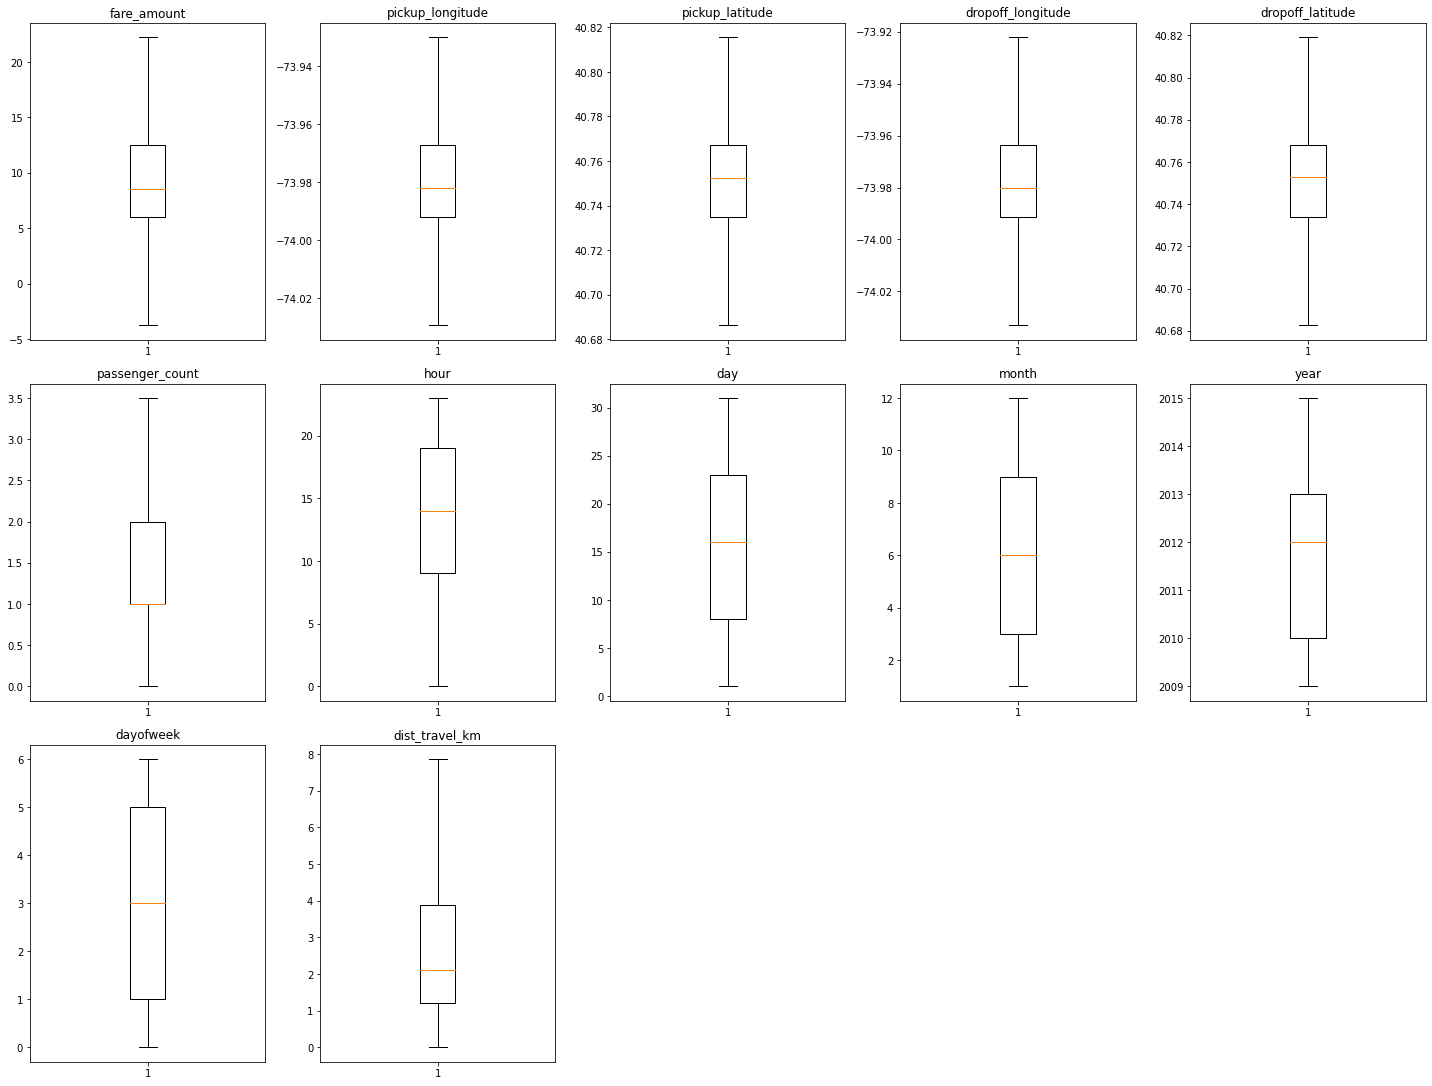

In [46]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df2.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df2[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [47]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.475450


In [48]:
df2.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.475450


### Corelation

In [75]:
# use the corr() function to generate the correlation matrix of the numeric variables
co = df1.corr()

# print the correlation matrix
display(co,type(co))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125871,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.844363
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073311,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.098078
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515735,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.046821
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245674,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.186531
dropoff_latitude,-0.125871,0.073311,0.515735,0.245674,1.000000,-0.006329,0.019764,-0.003499,-0.001190,-0.009595,-0.031932,-0.038873
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006329,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009725
hour,-0.023623,0.011579,0.029681,-0.046558,0.019764,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.038352
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003499,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.003076
month,0.030817,0.001169,0.001562,0.002391,-0.001190,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011626
year,0.141277,0.010198,-0.014243,0.011346,-0.009595,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.024271


pandas.core.frame.DataFrame

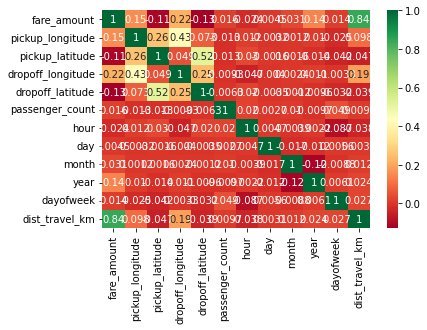

In [77]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df1.corr(),cmap = 'RdYlGn',annot=True)

# display the plot
plt.show()

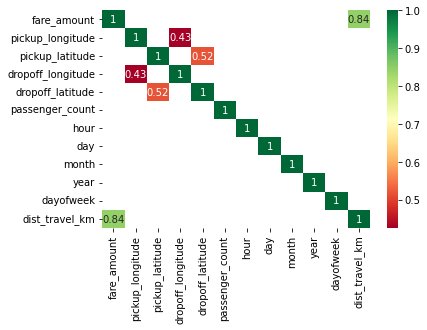

In [79]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(co[(co >= 0.4) | (co <= -0.4)],cmap = 'RdYlGn',annot=True)

# display the plot
plt.show()

### Implement linear regression and random forest regression models. 

#### 1. Split the data into features and target dataframes


In [80]:
# select only the target variable 'amount' and store it in dataframe 'y'
y = pd.DataFrame(df1['fare_amount'])

In [81]:
# use 'drop()' to remove the variable 'amount' from df_taxi
# 'axis = 1' drops the corresponding column(s)
x = df1.drop('fare_amount',axis = 1)

#### 2. Split the data into training and test sets

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (160000, 11)
The shape of X_test is: (40000, 11)
The shape of y_train is: (160000, 1)
The shape of y_test is: (40000, 1)


#### Linear Regression

In [84]:
import statsmodels.api as sm

In [85]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full = sm.OLS(y_train, x_train).fit()

# print the summary output
print(linreg_full.summary())

                                 OLS Regression Results                                
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.316e+05
Date:                Thu, 18 Aug 2022   Prob (F-statistic):                        0.00
Time:                        16:10:51   Log-Likelihood:                     -3.9082e+05
No. Observations:              160000   AIC:                                  7.817e+05
Df Residuals:                  159989   BIC:                                  7.818e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
# linreg_full = sm.OLS(x_train,y_train).fit()

# print the summary output
# print(linreg_full.summary())

In [86]:
linreg_full_predictions = linreg_full.predict(x_test)
linreg_full_predictions

49673      6.603748
171551     5.392594
5506       9.556585
38370      6.120355
36930      5.898148
            ...    
63840      8.868155
128107     2.604096
108940    11.022542
199933    12.126706
22902     12.005790
Length: 40000, dtype: float64

In [87]:
actual_fare = y_test["fare_amount"]
actual_fare

49673      4.0
171551     6.1
5506       8.5
38370      4.9
36930      6.5
          ... 
63840     10.7
128107     2.5
108940    10.0
199933    11.3
22902     12.5
Name: fare_amount, Length: 40000, dtype: float64

In [88]:
from statsmodels.tools.eval_measures import rmse

In [89]:
# calculate rmse using rmse()
linreg_full_rmse = rmse(actual_fare,linreg_full_predictions )

# calculate R-squared using rsquared
linreg_full_rsquared = linreg_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_rsquared_adj = linreg_full.rsquared_adj 

In [90]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linreg full model ",
                     'RMSE':linreg_full_rmse,
                     'R-Squared': linreg_full_rsquared,
                     'Adj. R-Squared': linreg_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,2.759165,0.940922,0.940918


### Decision Tree

In [91]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [92]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(x_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'

C:\Users\SIT\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [93]:
y_pred_DT=decision_tree_model.predict(x_test)
y_pred_DT

array([ 6. ,  6.5,  8.5, ..., 10. , 10.9, 12. ])

In [94]:
y_test

,fare_amount
49673,4.0
171551,6.1
5506,8.5
38370,4.9
36930,6.5
...,...
63840,10.7
128107,2.5
108940,10.0
199933,11.3


In [95]:
r_squared_DT=decision_tree_model.score(x_test,y_test)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)
Adj_r_squared_DT

0.6052778859187499

In [96]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

In [97]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model ",
                     'RMSE':rmse_DT,
                     'R-Squared': r_squared_DT,
                     'Adj. R-Squared': Adj_r_squared_DT     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,2.759165,0.940922,0.940918
1,Decision Tree Model,3.424367,0.605305,0.605278


### Decision Tree with pruning

In [98]:


# instantiate the 'DecisionTreeRegressor' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 32 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)



In [99]:
y_pred_DT_prune=decision_tree_prune.predict(x_test)
y_pred_DT_prune

array([ 4.99914948,  5.67888429,  9.75156665, ..., 11.96624034,
       11.08746429, 11.08746429])

In [100]:
r_squared_DT_prune=decision_tree_prune.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT_prune = 1 - (1-r_squared_DT_prune)*(n-1)/(n-p-1)
Adj_r_squared_DT_prune
# Compute RMSE
rmse_DT_prune = sqrt(mean_squared_error(y_test, y_pred_DT_prune))

In [101]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model after pruning ",
                     'RMSE':rmse_DT_prune,
                     'R-Squared': r_squared_DT_prune,
                     'Adj. R-Squared': Adj_r_squared_DT_prune     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,2.759165,0.940922,0.940918
1,Decision Tree Model,3.424367,0.605305,0.605278
2,Decision Tree Model after pruning,2.583026,0.775426,0.775411


### Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [103]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(x_train, y_train)

C:\Users\SIT\AppData\Local\Temp/ipykernel_6136/854013030.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

In [104]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(x_test)
y_pred_RF

array([ 4.791 ,  6.73  ,  8.98  , ..., 11.0875, 11.808 , 13.855 ])

In [105]:
r_squared_RF = rf_reg.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)
Adj_r_squared_RF
# Compute RMSE
rmse_RF = sqrt(mean_squared_error(y_test, y_pred_RF))

In [106]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 1.4891101490773808
Mean Squared Error (MSE): 5.579342779120985
Root Mean Squared Error (RMSE): 2.362063246215263


In [107]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest ",
                     'RMSE':rf_reg_RMSE,
                     'R-Squared': r_squared_RF,
                     'Adj. R-Squared': Adj_r_squared_RF     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model,2.759165,0.940922,0.940918
1,Decision Tree Model,3.424367,0.605305,0.605278
2,Decision Tree Model after pruning,2.583026,0.775426,0.775411
3,Random Forest,2.362063,0.812205,0.812192


####  ------ End ------

In [ ]:
str = "abc UTC "
str.strip('UTC ')
# df1['pickup_datetime'].strip('UTC ')
# df1.head()

In [ ]:
# Formatting the Format the datetime column "pickup_datetime" and only keep the date (format will be YY-mm-dd).
date_st = [dates.strip
           
           ("UTC ") for dates in df1['pickup_datetime']]
df1['pickup_datetime'] = [datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') for dates in date_st]
df1['pickup_datetime'] = df1['pickup_datetime'].dt.date



In [ ]:
# Formatting the Format the datetime column "pickup_datetime" and only keep the date (format will be YY-mm-dd).
date_st = [dates.strip("UTC ") for dates in df1['pickup_datetime']]
df1['pickup_datetime'] = [datetime.strptime(dates, '%Y-%m-%d %H:%M:%S') for dates in date_st]
df1['pickup_datetime'] = df1['pickup_datetime'].dt.date


In [ ]:
# final print
df1

In [ ]:
# sorting the dataframe 'df1' based on the pickup_datetime date ascending and print the head with 10 examples.
df1.sort_values(by='pickup_datetime', ascending=True, inplace=True, ignore_index=True)
df1.head(10)

In [ ]:
#Calculating distances between the pick-up and drop-off locations.
from math import sqrt

lat1 = df1['pickup_latitude']
lon1 = df1['pickup_longitude']
lat2 = df1['dropoff_latitude']
lon2 = df1['dropoff_longitude']

In [ ]:
# df1['distance'] = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)
# df1.tail(10)

In [ ]:
# p = pi/180
# a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
# df1['distance'] = 12742 * asin(sqrt(a)) #2*R*asin

In [ ]:
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = []
    for i in range(len(lat1)):
        a.append(0.5 - cos((lat2[i]-lat1[i])*p)/2 + cos(lat1[i]*p) * cos(lat2[i]*p) * (1-cos((lon2[i]-lon1[i])*p))/2)
    return 12742 * asin(sqrt(a[i])) #2*R*asin...


In [ ]:
df1['distance'] = distance(lat1,lon1,lat2,lon2)

In [ ]:
df1.tail(10)

In [ ]:
# Selecting all the records in January 2014 and store it in a variable called 'trip_jan14'. 
# Finally print your dataframe that must look like the one below.
start = pd.to_datetime("2014-01-01").date()
end = pd.to_datetime("2014-01-31").date()
df_jan14 = df1.loc[(df1['pickup_datetime'] >= start) & (df1['pickup_datetime'] <= end)]
# your final print
df_jan14

In [ ]:
#excluding rows from the variable 'trip_jan14' that will be considered outliers. 
# The outliers in this task are considered the values below quantile 5% and above quantile 95% for the columns 'distance' and 'fare_amount'. 
# Therefore, selecting all rows that are within the range 5% and 95% of this two columns.
fare_low = df_jan14['fare_amount'].quantile(0.05)
fare_hi = df_jan14['fare_amount'].quantile(0.95)
dist_low = df_jan14['distance'].quantile(0.05)
dist_hi = df_jan14['distance'].quantile(0.95)

outliers_list = df_jan14[(df_jan14["distance"] < dist_hi) & (df_jan14["distance"] > dist_low) & (df_jan14['fare_amount'] < fare_hi) & (df_jan14['fare_amount'] > fare_low)]
filtered = outliers_list
# your final print
filtered

In [ ]:
#Data Visualization
#Creating two scatter plots for the fare amount in y-axis and trip distances in x-axis using the two dataframes, 
# without the outliers (i.e., stored in variable 'filtered') and with the outliers (i.e., stored in variable 'df_jan14').
fig, ax1 = plt.subplots(1,2, figsize=(20,8))
filtered.plot.scatter(x='distance', y='fare_amount', s=5, ax=ax1[0], title="Outliers excluded", 
                           xlabel="Distance", ylabel="Fare amount (USD)")
df_jan14.plot.scatter(x='distance', y='fare_amount', s=5, ax=ax1[1], title="With Outliers",
                           xlabel="Distance", ylabel="Fare amount (USD)")
plt.suptitle("Fare amount vs. Travel distance", fontsize=14)
plt.show()

In [ ]:
err
#sns.pairplot(df1)

In [ ]:
plt.figure(figsize=(15,15))
df1.boxplot()

In [ ]:
sns.boxplot(df1['fare_amount'],data = df1)

## Detecting outliers

In [ ]:
df1_sample = df1.loc[:10000,:]
df1_sample.shape

In [ ]:
df1_sample

In [ ]:
df1_sample.describe()

In [ ]:
df1_sample.boxplot()

## Z-score

In [ ]:
def ZScore(dataFrame):
    outliers = []
    for i in dataFrame.columns:
        for val in dataFrame[i]:
            z = (val - dataFrame[i].mean())/dataFrame[i].std()
            if z > 3 or z < -3:
                outliers.append(i)
                break
    return outliers
            

In [ ]:
outliers_list = ZScore(df1_sample)
outliers_list

In [ ]:
def ZScore_detect(dataFrame):
    outliers = []
    for i in dataFrame.columns:
#         for val in dataFrame[i]:
            upper = dataFrame[i].mean() + (3 * dataFrame[i].std())
            lower = dataFrame[i].mean() - (3 * dataFrame[i].std())
            
            if any((dataFrame[i]>upper) | (dataFrame[i]<lower)):
                outliers.append(i)
                break
    return outliers
            

In [ ]:
outliers_list1 = ZScore_detect(df1_sample)
outliers_list1

In [ ]:
err

In [ ]:
 def ZScore_treat(dataFrame,outliers):
    for i in outliers:
        upper_limit = dataFrame[i].mean() + (3 * dataFrame[i].std())
        lower_limit = dataFrame[i].mean() - (3 * dataFrame[i].std())
        for val in dataFrame[i]:
            z = (val - dataFrame[i].mean())/dataFrame[i].std()
            if z > 3:
                val = upper_limit
                print("UL")
            if z < -3:
                val = lower_limit
                
    return dataFrame

In [ ]:
df1_sample = ZScore_treat(df1_sample,outliers_list)

In [ ]:
outliers_list = ZScore(df1_sample)
outliers_list

In [ ]:
df1_sample.boxplot()

In [ ]:
df1.corr()

###  Outlier detection using IQR

In [ ]:
df1_sample = df1.loc[:10000,:]
df1_sample.shape

In [ ]:
def outlier_IQR(dataFrame):
    outliers = []
    for i in dataFrame.columns:
        q1 = np.percentile(dataFrame[i],25)
        q3 = np.percentile(dataFrame[i],75)
        iqr = q3 - q1
        
        l_bound = q1 - (1.5 * iqr)
        u_bound = q3 + (1.5 * iqr)
        
        print(i,l_bound,u_bound)
        
        if any((dataFrame[i] < l_bound) | (dataFrame[i] > u_bound)):
            outliers.append(i)
            pass
            
    return outliers

In [ ]:
outliers_list = outlier_IQR(df1_sample)
outliers_list

### Outlier treatment

In [ ]:
def outlier_treat_IQR(dataFrame):
    outliers = []
    for i in dataFrame.columns:
        q1 = np.percentile(dataFrame[i],25)
        q3 = np.percentile(dataFrame[i],75)
        iqr = q3 - q1
        
        l_bound = q1 - (1.5 * iqr)
        u_bound = q3 + (1.5 * iqr)
        
        print(i,l_bound,u_bound)
        
        np.where(dataFrame[i] > u_bound,u_bound,dataFrame[i])
        if i == 'fare_'
        np.where(dataFrame[i] < l_bound,l_bound)
    
    return dataFrame

In [ ]:
df1_sample = outlier_treat_IQR(df1_sample)
outliers_list = outlier_IQR(df1_sample)
outliers_list